In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/Outlier_Loan_dataset.csv")
data

,User_ID,Loan_ID,City,Age,Job,Education,Marriage_Status,Account_Balance,Loan_Amount,Credit_Score,Debit_Transactions,Loan_Duration_Months,Application_Date,Current_Balance
0,U2169,L532233,Quetta,39.0,Clerk,Matric,Married,269967.77,29744.65,554.61,8955.54,45,2024-11-26,139275.96
1,U2807,L516508,Karachi,33.0,Driver,Matric,Married,246231.68,365315.52,606.98,14781.58,6,2024-08-18,61391.92
2,U4536,L471613,Peshawar,41.0,Manager,Bachelor,Divorced,202981.52,26227.40,629.32,15126.12,59,2024-01-27,115353.44
3,U9628,L354161,Lahore,50.0,Doctor,Matric,Married,167653.16,40761.15,744.38,18308.41,9,2022-09-19,136059.95
4,U8765,L650075,Karachi,32.0,Teacher,PhD,Married,234911.17,-6808.44,677.83,5431.99,35,2022-08-23,50588.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,U1697,L548765,Faisalabad,32.0,Driver,Matric,Divorced,253507.51,52324.42,651.42,14657.24,16,2023-11-27,80502.87
996,U7421,L887357,Rawalpindi,52.0,Unemployed,Master,Divorced,1192043.64,57732.58,546.11,19979.87,18,2023-06-29,125286.39
997,U7524,L232943,Rawalpindi,41.0,Doctor,Matric,Married,155906.27,12747.18,633.99,36790.37,14,2022-07-20,96334.77
998,U8915,L673563,Faisalabad,29.0,Engineer,Matric,Divorced,1151079.90,60025.29,732.17,20656.25,9,2022-12-02,142483.99


In [ ]:
df = data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   User_ID               1000 non-null   object 
 1   Loan_ID               1000 non-null   object 
 2   City                  1000 non-null   object 
 3   Age                   980 non-null    float64
 4   Job                   1000 non-null   object 
 5   Education             980 non-null    object 
 6   Marriage_Status       1000 non-null   object 
 7   Account_Balance       1000 non-null   float64
 8   Loan_Amount           980 non-null    float64
 9   Credit_Score          1000 non-null   float64
 10  Debit_Transactions    1000 non-null   float64
 11  Loan_Duration_Months  1000 non-null   int64  
 12  Application_Date      1000 non-null   object 
 13  Current_Balance       1000 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 109.5+ KB


In [ ]:
df.shape

(1000, 14)

In [ ]:
df.head(10)

,User_ID,Loan_ID,City,Age,Job,Education,Marriage_Status,Account_Balance,Loan_Amount,Credit_Score,Debit_Transactions,Loan_Duration_Months,Application_Date,Current_Balance
0,U2169,L532233,Quetta,39.0,Clerk,Matric,Married,269967.77,29744.65,554.61,8955.54,45,2024-11-26,139275.96
1,U2807,L516508,Karachi,33.0,Driver,Matric,Married,246231.68,365315.52,606.98,14781.58,6,2024-08-18,61391.92
2,U4536,L471613,Peshawar,41.0,Manager,Bachelor,Divorced,202981.52,26227.40,629.32,15126.12,59,2024-01-27,115353.44
3,U9628,L354161,Lahore,50.0,Doctor,Matric,Married,167653.16,40761.15,744.38,18308.41,9,2022-09-19,136059.95
4,U8765,L650075,Karachi,32.0,Teacher,PhD,Married,234911.17,-6808.44,677.83,5431.99,35,2022-08-23,50588.27
5,U9245,L501841,Rawalpindi,32.0,Clerk,Matric,Single,219674.27,56398.81,583.23,19147.97,17,2024-08-19,101679.14
6,U8345,L553205,Faisalabad,50.0,Unemployed,Intermediate,Single,244759.66,50036.16,674.30,-3930.74,40,2025-02-09,96859.39
7,U9220,L690872,Karachi,42.0,Doctor,Intermediate,Divorced,231758.59,25487.34,572.63,10590.81,18,2023-01-01,74176.78
8,U3943,L492114,Lahore,30.0,Engineer,Master,Married,252477.64,69777.37,704.13,11582.08,57,2025-05-14,103694.27
9,U5062,L632767,Faisalabad,40.0,Clerk,Intermediate,Divorced,173238.24,78127.10,626.44,19433.29,36,2024-03-15,75988.54


In [ ]:
df.isnull().sum()

,0
User_ID,0
Loan_ID,0
City,0
Age,20
Job,0
Education,20
Marriage_Status,0
Account_Balance,0
Loan_Amount,20
Credit_Score,0


<Axes: >

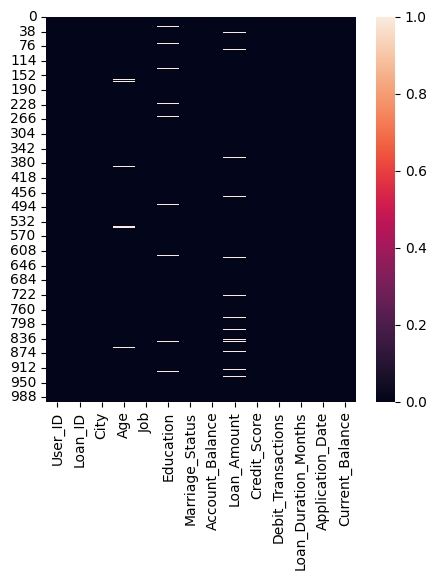

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull())

In [ ]:
null_percentage = df.isnull().sum()/df.shape[0]*100
null_percentage

,0
User_ID,0.0
Loan_ID,0.0
City,0.0
Age,2.0
Job,0.0
Education,2.0
Marriage_Status,0.0
Account_Balance,0.0
Loan_Amount,2.0
Credit_Score,0.0


In [ ]:
df =df.fillna('Unknown')


<Axes: >

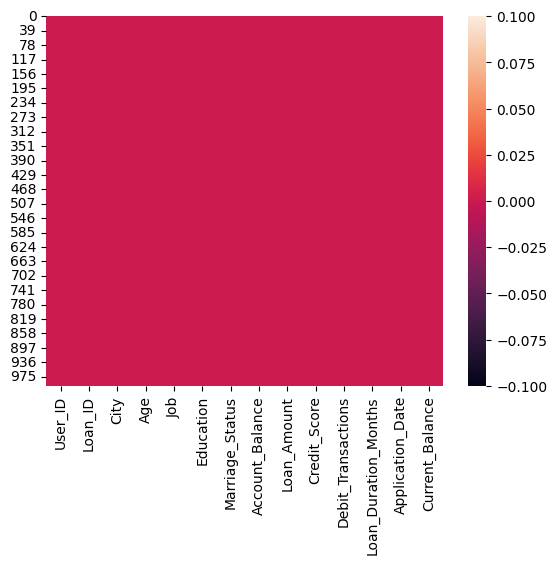

In [ ]:
sns.heatmap(df.isnull())

<Axes: xlabel='Loan_Amount'>

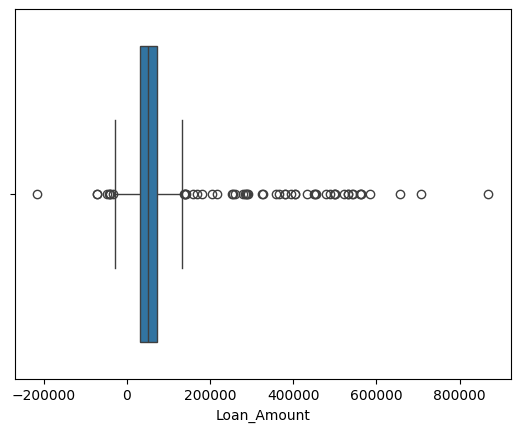

In [ ]:
df['Loan_Amount'] = pd.to_numeric(df['Loan_Amount'], errors='coerce')
sns.boxplot(x='Loan_Amount', data=df)

<Axes: xlabel='Loan_Amount', ylabel='Credit_Score'>

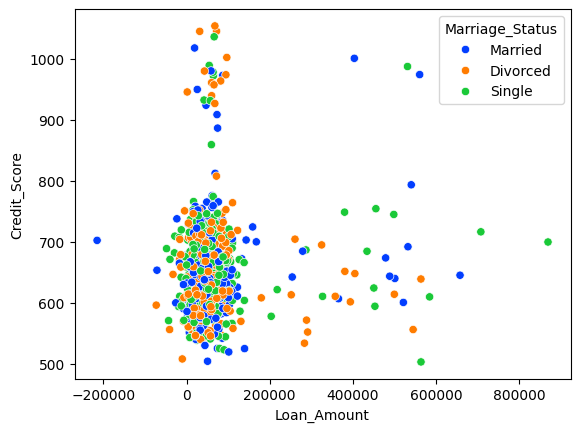

In [ ]:
sns.scatterplot(data=df, x='Loan_Amount', y='Credit_Score', hue = 'Marriage_Status' , palette = 'bright')


pd.cut is a pandas function that is used to segment (or “bin”) continuous numeric data into discrete intervals.
It’s especially useful when you want to convert a numeric variable into categories.




<Axes: xlabel='Loan_Bin', ylabel='Credit_Score'>

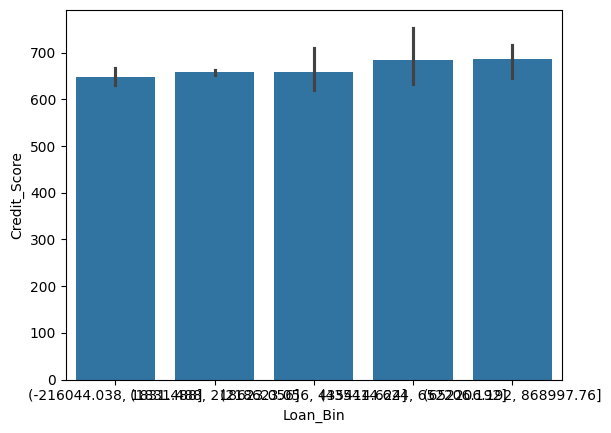

In [ ]:
df['Loan_Bin'] = pd.cut(df['Loan_Amount'], bins=5)
sns.barplot(data=df, x='Loan_Bin', y='Credit_Score')

pd.cut is a pandas function used to divide continuous numeric data into discrete bins or intervals, essentially turning numbers into categories.
It’s very useful when you want to group numeric values for analysis or plotting, like creating ranges for a bar chart.

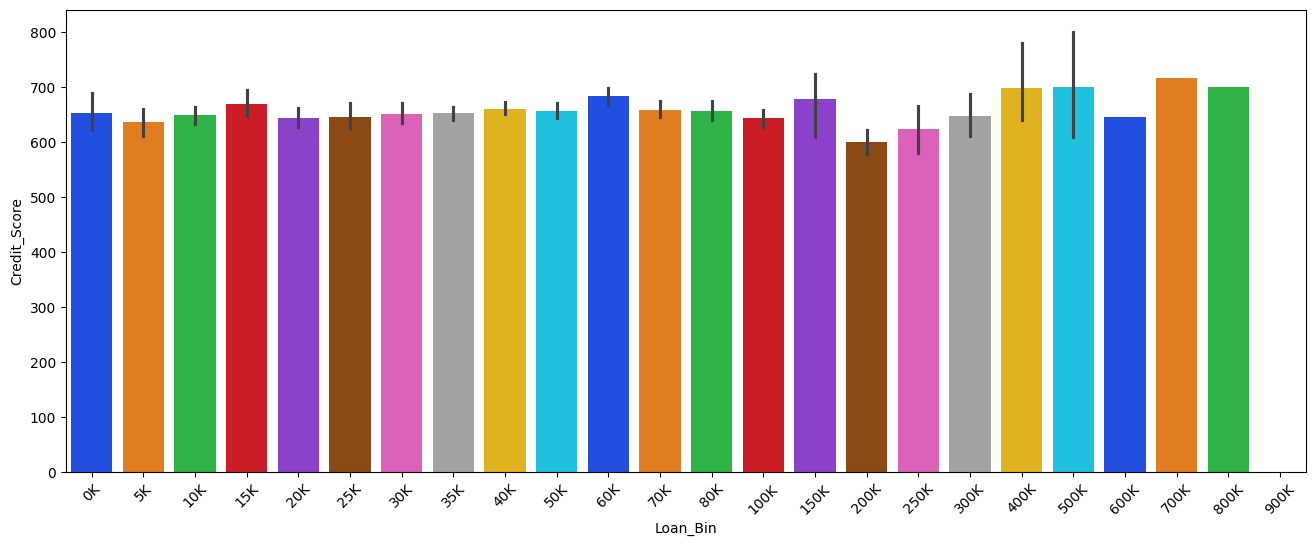

In [ ]:
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000,
        50000, 60000, 70000, 80000, 100000, 150000, 200000, 250000,
        300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]

labels = [f'{int(b/1000)}K' if b<1000000 else '1M' for b in bins[:-1]]


df['Loan_Bin'] = pd.cut(df['Loan_Amount'], bins=bins, labels=labels)


plt.figure(figsize=(16,6))
sns.barplot(data=df, x='Loan_Bin', y='Credit_Score', palette='bright')
plt.xticks(rotation=45)
plt.show()

In [ ]:
data ['Credit_Score'] = pd.to_numeric(data['Credit_Score'], errors = "coerce")

data = data.dropna(subset= ["Credit_Score"])

Q1 = np.percentile(data["Credit_Score"], 25)
Q3 = np.percentile(data["Credit_Score"] , 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data["Credit_Score"] < lower_bound) | (data["Credit_Score"] > upper_bound)]

print("outliers :\n" , outliers)

outliers :
     User_ID  Loan_ID        City   Age         Job     Education  \
10    U8462  L514482      Lahore  30.0  Unemployed        Matric   
27    U8030  L209647    Peshawar  38.0    Salesman  Intermediate   
63    U3190  L781988  Rawalpindi  23.0     Teacher  Intermediate   
90    U1004  L415421     Karachi  35.0      Doctor        Master   
123   U4603  L769161     Karachi  20.0     Teacher  Intermediate   
125   U8685  L202101  Faisalabad  56.0       Clerk  Intermediate   
145   U7829  L933014     Karachi  42.0     Manager        Master   
173   U7582  L941588      Lahore  38.0    Engineer        Matric   
199   U7712  L135110   Islamabad  23.0       Clerk        Master   
236   U4678  L415821      Multan  14.0    Engineer  Intermediate   
270   U6954  L253393      Lahore  49.0     Teacher      Bachelor   
279   U3875  L650405    Peshawar  31.0       Clerk        Matric   
325   U9366  L122302  Rawalpindi  22.0  Unemployed           PhD   
343   U4091  L330020  Rawalpindi  29

In [ ]:
data ['Loan_Amount'] = pd.to_numeric(data['Loan_Amount'], errors = "coerce")

data = data.dropna(subset= ["Loan_Amount"])

Q1 = np.percentile(data["Loan_Amount"], 25)
Q3 = np.percentile(data["Loan_Amount"] , 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data["Loan_Amount"] < lower_bound) | (data["Loan_Amount"] > upper_bound)]

print("outliers :\n" , outliers)

outliers :
     User_ID  Loan_ID        City   Age         Job     Education  \
1     U2807  L516508     Karachi  33.0      Driver        Matric   
24    U7560  L388023      Multan  29.0  Unemployed  Intermediate   
28    U3554  L235026      Lahore  28.0      Driver           PhD   
33    U2593  L934748  Faisalabad  24.0     Manager           PhD   
38    U7677  L378070    Peshawar  21.0       Clerk        Master   
53    U1441  L296967     Karachi  41.0     Teacher           PhD   
74    U6719  L250385   Islamabad   8.0    Engineer  Intermediate   
88    U9355  L987118    Peshawar  29.0     Teacher        Matric   
109   U1516  L418060      Multan  34.0     Manager        Matric   
118   U9868  L925097      Lahore  46.0      Doctor        Matric   
125   U8685  L202101  Faisalabad  56.0       Clerk  Intermediate   
131   U6935  L184408     Karachi  35.0      Doctor        Matric   
158   U4405  L864235     Karachi  23.0    Engineer  Intermediate   
208   U6898  L536055      Multan  40

In [ ]:
median_score = data["Loan_Duration_Months"].median()
data['Is Outliers'] = (data['Loan_Duration_Months'] < lower_bound )| (data['Loan_Duration_Months'] > upper_bound)
data['Loan_Duration_Months'] = data ['Loan_Duration_Months'].apply(lambda x : median_score if x < lower_bound or x > upper_bound else x)

print(data)

    User_ID  Loan_ID        City   Age         Job Education Marriage_Status  \
0     U2169  L532233      Quetta  39.0       Clerk    Matric         Married   
1     U2807  L516508     Karachi  33.0      Driver    Matric         Married   
2     U4536  L471613    Peshawar  41.0     Manager  Bachelor        Divorced   
3     U9628  L354161      Lahore  50.0      Doctor    Matric         Married   
4     U8765  L650075     Karachi  32.0     Teacher       PhD         Married   
..      ...      ...         ...   ...         ...       ...             ...   
995   U1697  L548765  Faisalabad  32.0      Driver    Matric        Divorced   
996   U7421  L887357  Rawalpindi  52.0  Unemployed    Master        Divorced   
997   U7524  L232943  Rawalpindi  41.0      Doctor    Matric         Married   
998   U8915  L673563  Faisalabad  29.0    Engineer    Matric        Divorced   
999   U4571  L629875      Multan  40.0      Driver       PhD        Divorced   

     Account_Balance  Loan_Amount  Cred